# TRACTION TEST

The first test, a square is pulled on. Import library and relevant classes

![image info](img/square.png)

In [21]:
from numpy import ndarray
from pythhon.pbbb.problem import Problem
from pythhon.pbbb.boundary_condition import BoundaryCondition
from pythhon.pbbb.load import Load
from pythhon.pbbb.field import Field
from pythhon.fem.element.finite_element import FiniteElement
from pythhon.parameters import *
from pp.post_processing import *
from mgis import behaviour as mgis_bv
from pythhon.pbbb.material import Material

## Loading and time steps
Define pseudo-time steps

In [22]:
time_steps = np.linspace(0.0, 0.008, 10, dtype=real)
iterations = 12
print(time_steps)

[0.         0.00088889 0.00177778 0.00266667 0.00355556 0.00444444
 0.00533333 0.00622222 0.00711111 0.008     ]


## Volumetric load
Define volumetric load

In [23]:
def volumetric_load(time: float, position: ndarray):
    return 0

loads = [Load(volumetric_load, 0), Load(volumetric_load, 1)]

## Boundary coditions
Define boundary conditions

In [24]:
def pull(time: float, position: ndarray) -> float:
    return time

def fixed(time: float, position: ndarray) -> float:
    return 0.0

boundary_conditions = [
    BoundaryCondition("RIGHT", pull, BoundaryType.DISPLACEMENT, 0),
    BoundaryCondition("LEFT", fixed, BoundaryType.DISPLACEMENT, 0),
    BoundaryCondition("BOTTOM", fixed, BoundaryType.DISPLACEMENT, 1),
]

## Load mesh file

load the geof mesh file

In [25]:
mesh_file_path = "../meshes/square_1.geof"

## Deifne field
Define the dield under study (displacement, scalar field, which stress and strain measure, etc.)

In [26]:
displacement = Field(
    label="U",
    euclidean_dimension=2,
    field_type=FieldType.DISPLACEMENT_PLANE_STRAIN,
    strain_type=StrainType.DISPLACEMENT_SYMMETRIC_GRADIENT,
    stress_type=StressType.CAUCHY,
    derivation_type=DerivationType.SYMMETRIC,
)

## Define Finite Element
Define the finite element

In [27]:
finite_element = FiniteElement(
    element_type=ElementType.HDG_EQUAL,
    polynomial_order=1,
    euclidean_dimension=2,
    basis_type=BasisType.MONOMIAL
)

## Define problem object
Build the problem with the chosen finite element, mesh file, anf field

In [28]:
p = Problem(
    mesh_file_path=mesh_file_path,
    field=displacement,
    polynomial_order=finite_element.polynomial_order,
    finite_element=finite_element,
    time_steps=time_steps,
    iterations=iterations,
    boundary_conditions=boundary_conditions,
    loads=loads,
    quadrature_type=QuadratureType.GAUSS,
    tolerance=1.e-5
)

INTEGRATION ORDER : 4


## Define material
Define the material parameters, hypothesis, etc.

In [29]:
parameters = {"YoungModulus": 1.0, "PoissonRatio": 0.0}
stabilization_parameter = parameters["YoungModulus"] / (1.0 + parameters["PoissonRatio"])

mat = Material(
    nq=p.mesh.number_of_cell_quadrature_points_in_mesh,
    library_path="../behaviour/src/libBehaviour.so",
    library_name="Elasticity",
    hypothesis=mgis_bv.Hypothesis.PLANESTRAIN,
    stabilization_parameter=stabilization_parameter,
    lagrange_parameter=parameters["YoungModulus"],
    field=displacement,
    parameters=None,
)

## Launch computations
Actually launch the computation

/home/dsiedel/Projects/pythhon_shared/res
----------------------------------------------------------------------------------------------------
TIME_STEP : 0 | LOAD_VALUE : 0.0
ITER : 0000 | RES_MAX : 0.0
ITERATIONS : 1
----------------------------------------------------------------------------------------------------
TIME_STEP : 1 | LOAD_VALUE : 0.0008888888888888889
ITER : 0000 | RES_MAX : 0.0008888888888888889
ITER : 0001 | RES_MAX : 6.5052130349130266e-18
ITERATIONS : 2
----------------------------------------------------------------------------------------------------
TIME_STEP : 2 | LOAD_VALUE : 0.0017777777777777779
ITER : 0000 | RES_MAX : 0.0008888888888888889
ITER : 0001 | RES_MAX : 5.459849608453107e-18
ITERATIONS : 2
----------------------------------------------------------------------------------------------------
TIME_STEP : 3 | LOAD_VALUE : 0.002666666666666667
ITER : 0000 | RES_MAX : 0.0008888888888888896
ITER : 0001 | RES_MAX : 3.469446951953614e-18
ITERATIONS : 2
----

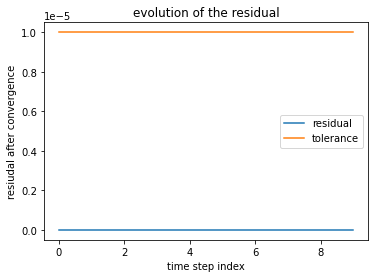

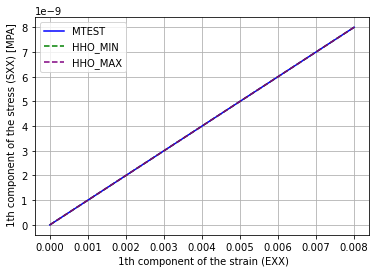

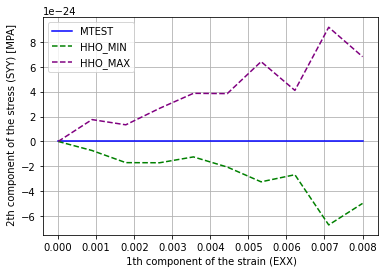

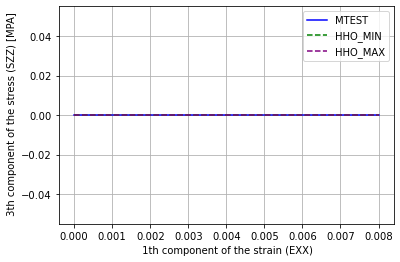

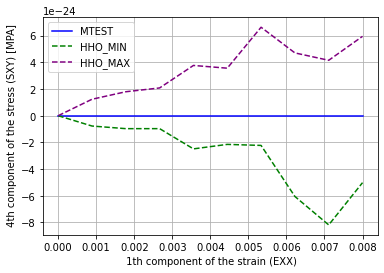

In [30]:
from tests.test_mecha.test_square_elasticity.pp import plot_data_2
p.solve_newton_2(mat, verbose=False, check=False)
mtest_file_path = (
    "../mtest/traction_x_elasticity.res"
)
hho_file_path = "../../../../res"
plot_data_2(mtest_file_path, hho_file_path, len(time_steps), 1, 5, 4, 8)
plot_data_2(mtest_file_path, hho_file_path, len(time_steps), 1, 6, 4, 9)
plot_data_2(mtest_file_path, hho_file_path, len(time_steps), 1, 7, 4, 10)
plot_data_2(mtest_file_path, hho_file_path, len(time_steps), 1, 8, 4, 11)
